In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import cm
warnings.filterwarnings('ignore')
pd.options.display.float_format = "{:.2f}".format
%reload_ext nb_black

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12.7,8.2
sns.set(style='white')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'

# Initial analysis of Red and White wines.

### Features:
1. __Fixed Acidity__ - measure of the total concentration of titratable acids and free hydrogen ions.
2. __Volatile Acidity__ - measure of the total concentration of ‘volatile acids’ in wine.
3. __Citric Acid__ - one of three primary acids found in grapes and converted by the winemaking process.
4. __Residual Sugars__ - natural grape sugars that are leftover after fermentation ceases.
5. __Chlorides__ - The amount of chlorides in a wine is usually an indicator of its saltiness.
6. __Sulphur Dioxide levels__ - Sulphur dioxide (SO2) is used as an antioxidant and preservative and has become widely used in winemaking
7. __Density__ -  measure of the alcohol concentration in wines.
8. __pH__ - (power of hydrogen) - measure of the hydrogen ion concentration in the solution. 
9. __Sulphates__ - Salts of sulfuric acid in wine.
10. __Alcohol__



In [3]:
data_r = pd.read_csv(r'Wine\winequality_red.csv')
data_w = pd.read_csv(r'Wine\winequality_white.csv')
data_r.columns == data_w.columns # Check if red wines and white wines have same columns [features]
data_r['color'] = 'Red'
data_w['color'] = 'White'
wines = pd.concat([data_r,data_w],axis=0)
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00
mean,7.22,0.34,0.32,5.44,0.06,30.53,115.74,0.99,3.22,0.53,10.49,5.82
std,1.30,0.16,0.15,4.76,0.04,17.75,56.52,0.00,0.16,0.15,1.19,0.87
min,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00,3.00
25%,6.40,0.23,0.25,1.80,0.04,17.00,77.00,0.99,3.11,0.43,9.50,5.00
50%,7.00,0.29,0.31,3.00,0.05,29.00,118.00,0.99,3.21,0.51,10.30,6.00
75%,7.70,0.40,0.39,8.10,0.07,41.00,156.00,1.00,3.32,0.60,11.30,6.00
max,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90,9.00


In [4]:
mode_r,mode_w = data_r['quality'].mode(),data_w['quality'].mode()
print(f'Mode for Red wines is {int(mode_r)} and for White wine mode is {int(mode_w)}')

Mode for Red wines is 5 and for White wine mode is 6


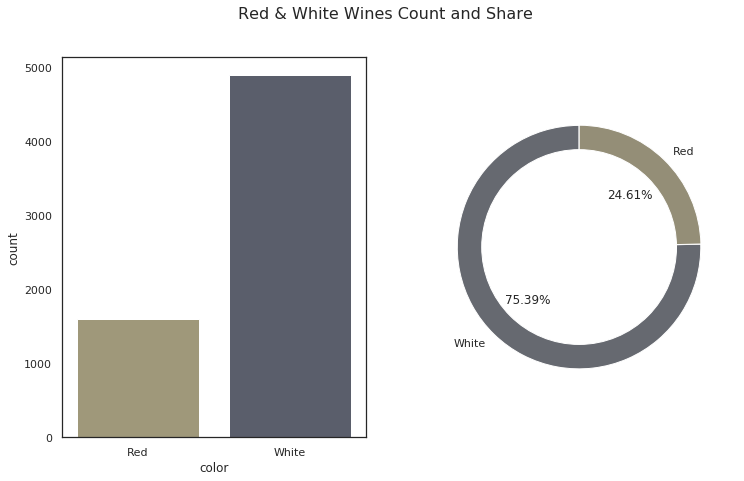

In [5]:
from matplotlib import cm
f, ax = plt.subplots(1,2,figsize=(12,7))
sns.countplot(data=wines,x='color',palette='cividis_r',ax=ax[0])
color = cm.cividis(np.linspace(.4,.6, 2))
my_circle=plt.Circle( (0,0), 0.8, color='white')
names=wines['color'].value_counts().index.tolist()
size=wines['color'].value_counts().values.tolist()
plt.pie(size, labels=names, colors=color,autopct='%1.2f%%',explode = (0.001,0.001),startangle=90)
p=plt.gcf()
p.gca().add_artist(my_circle)
f.suptitle("Red & White Wines Count and Share", fontsize=16)
plt.show()

In [6]:
quality = wines.groupby('color').agg(['mean','std','count','min','max'])['quality']
quality = quality.reset_index()

''

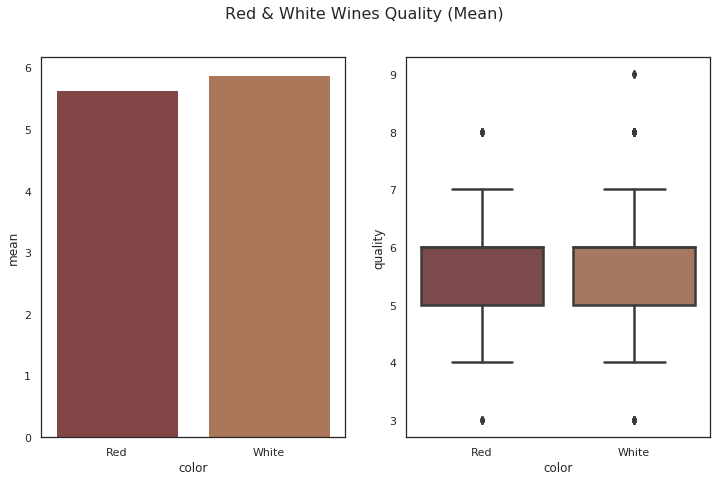

In [7]:
f, ax = plt.subplots(1,2,figsize=(12,7))
sns.barplot(data=quality,y='mean',x='color',palette='tab20b_d',saturation=0.9,ax=ax[0]);
sns.boxplot(data=wines,y='quality',linewidth=2.5,x='color',palette='tab20b_d',ax=ax[1])#showmeans=True);
f.suptitle("Red & White Wines Quality (Mean)", fontsize=16);
;

We can see that there is much more White Wines in our dataset. __75%__ of wines are white. Average quality of White wines is bigger then White wines, and also white wines has bigger max quality value.
* Red color wines: __1599__ 
* White color wines: __4898__
* Red wines average quality:  __5.64__ 
* White wines average quality:  __5.88__ 
* Red wines min quality: __3__ 
* Red wines max quality: __8__
* White wines min quality: __3__
* White wines max quality: __9__
* Mode for Red wines is __5__
* Mode for White wine is __6__

## Red Wines Analysis 
Let's split our data to red wines & white wines. First I'll try to analyse Red wines.

In [8]:
data_r.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [9]:
def strong(alcohol): #Function that will split our data to 4 categories
    if alcohol <= 9:
        return 'Light'
    elif alcohol >9 and alcohol <=11:
        return 'Medium'
    elif alcohol >11 and alcohol <=14:
        return 'Strong'
    else:
        return 'Very Strong'
    
def strong2(alcohol): #Function that will split our data to 4 categories
    if alcohol <= 9:
        return 1
    elif alcohol >9 and alcohol <=11:
        return 2
    elif alcohol >11 and alcohol <=14:
        return 3
    else:
        return 4

In [10]:
#Apply our function into new column with strenght of alcohol
data_r['Strength'] = data_r['alcohol'].apply(strong) 

In [11]:
data_r.sample(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,Strength
27,7.90,0.43,0.21,1.60,0.11,10.00,37.00,1.00,3.17,0.91,9.50,5,Red,Medium
438,10.40,0.41,0.55,3.20,0.08,22.00,54.00,1.00,3.15,0.89,9.90,6,Red,Medium
421,6.60,0.84,0.03,2.30,0.06,32.00,48.00,1.00,3.52,0.56,12.30,7,Red,Strong


In [12]:
a =data_r.groupby('Strength')['Strength'].count()/len(data_r)
b =data_r.groupby('Strength')['Strength'].count()
df = pd.concat([a,b],axis=1)
df.columns = ['pct','count']

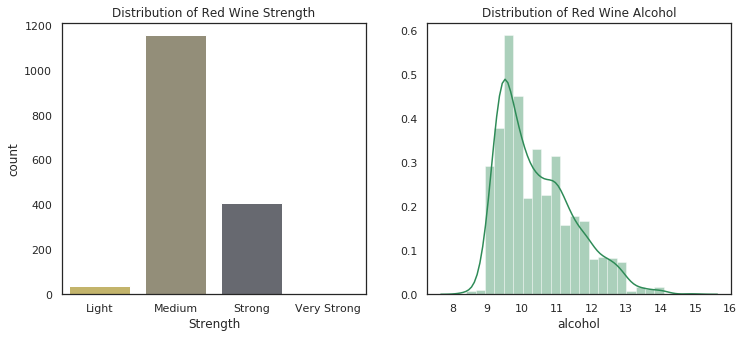

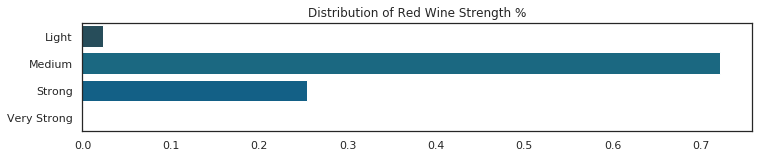

In [13]:
f, ax = plt.subplots(1,2,figsize=(12,5))
sns.countplot(x='Strength', data=data_r.sort_values(by='Strength'),palette='cividis_r',saturation=0.9,ax=ax[0]).set_title('Distribution of Red Wine Strength')

sns.distplot(data_r['alcohol'],color="seagreen",ax=ax[1]).set_title('Distribution of Red Wine Alcohol');
plt.figure(figsize=(12,2))
sns.barplot(data=df, x='pct',y=df.index,palette='ocean_d',saturation=0.75).set_title('Distribution of Red Wine Strength %');
plt.xlabel('')
plt.ylabel('');

We can see that most of wines are in "medium" group which is from 9-11 alcohol.
* Light:	__37__ _(2.31%)_
* Medium:	__1154__ _(72.17%)_
* Strong:	__407__ _(25.45%)_
* Very Strong:	__1__ _(0.06%)_

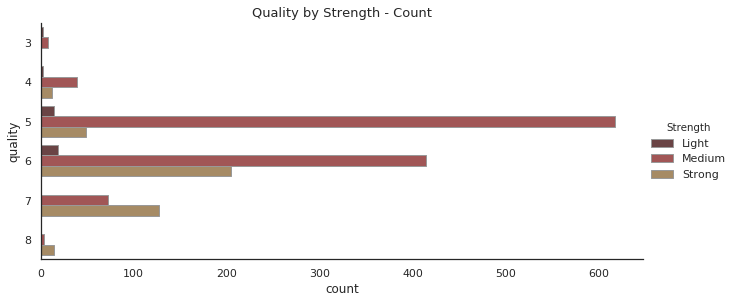

In [14]:
sns.catplot(y="quality", hue="Strength", kind="count",
            palette="tab20b_d", edgecolor=".6",
            data=data_r[data_r['Strength']!='Very Strong'].sort_values(by='Strength'),height=4, aspect=2.3);
plt.title('Quality by Strength - Count',fontsize=13);

In [15]:
data_r.groupby(['quality','Strength'])['Strength'].count()/data_r.groupby(['quality'])['Strength'].count()

quality  Strength   
3        Light         0.20
         Medium        0.80
4        Light         0.04
         Medium        0.74
         Strong        0.23
5        Light         0.02
         Medium        0.91
         Strong        0.07
         Very Strong   0.00
6        Light         0.03
         Medium        0.65
         Strong        0.32
7        Medium        0.36
         Strong        0.64
8        Medium        0.22
         Strong        0.78
Name: Strength, dtype: float64

#### We can see that for wines with quality in range from 3 to 6 most % of wines are medium strength.
* Quality 3 - 80% Medium, 20% Light
* Quality 4 - 74% Medium, 23% Strong, 4% Light
* Quality 5 - 91% Medium, 7% Strong, 2% Light and ~1% Very Strong
* Quality 6 - 65% Medium, 32% Strong, 3% Light
* Quality 7 - 64% Strong, 36% Medium
* Quality 8 - 78% Strong, 22% Medium  

Very instresting is that in wine groups from 6 quality score share of Strong Wines is increasing.

In [16]:
def quality(q): #Function that will split our data 3 categories of quality
    if q >=7:
        return 'Good'
    elif q<7 and q>=5: 
        return 'Average'
    else:
        return 'Bad'

In [17]:
data_r['rating'] = data_r['quality'].apply(quality)

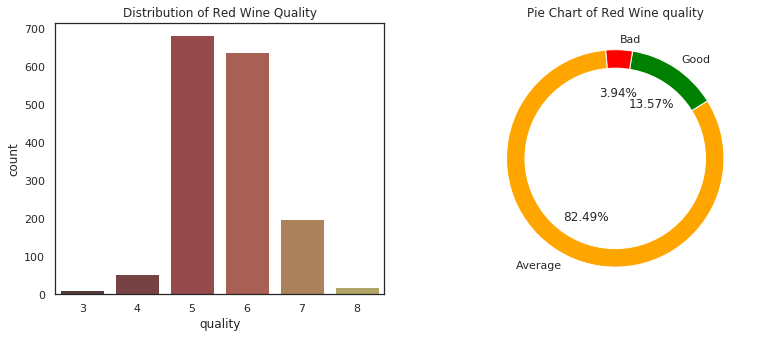

In [18]:
f, ax = plt.subplots(1,2,figsize=(13,5))
sns.countplot(x='quality', data=data_r.sort_values(by='quality'),palette='tab20b_d',saturation=0.9,ax=ax[0]).set_title('Distribution of Red Wine Quality');
#sns.countplot(x='rating', data=data_r.sort_values(by='rating'),palette='Oranges',saturation=0.9,ax=ax[1]).set_title('Distribution of Red Wine Quality');
c1 = ['orange','green','red']
my_circle=plt.Circle( (0,0), 0.83, color='white')
names=data_r['rating'].unique().tolist()
size=data_r['rating'].value_counts().tolist()
plt.pie(size, labels=names, colors=c1,autopct='%1.2f%%',startangle=95)
p=plt.gcf()
plt.title('Pie Chart of Red Wine quality')
p.gca().add_artist(my_circle);

We can see that most of wines are Average Quality which is 5 and 6 quality points. 
__4%__ of wines are bad quality. 
__13.57%__ are good quality
__82.5%__ are Average.
 

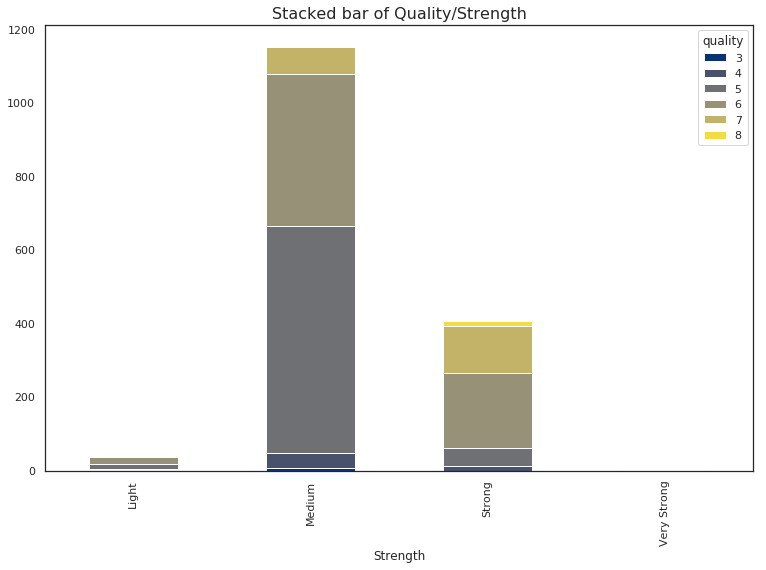

In [19]:

c1 = cm.cividis(np.linspace(.1,1.29, 8))
g = data_r.groupby(['quality','Strength'])['quality'].count()
g = g.sort_values(ascending=False)
g = pd.DataFrame(g)
g = g.rename(columns={'quality':'counts'})
g = g.sort_values(by='counts',ascending=True)
g = g.reset_index()
g = g.sort_values(by=['quality','Strength'],ascending=True)
g = g.pivot(index='Strength',columns='quality',values='counts')
g.plot(kind='bar',stacked=True,color=c1).set_title('Stacked bar of Quality/Strength',fontsize=16);

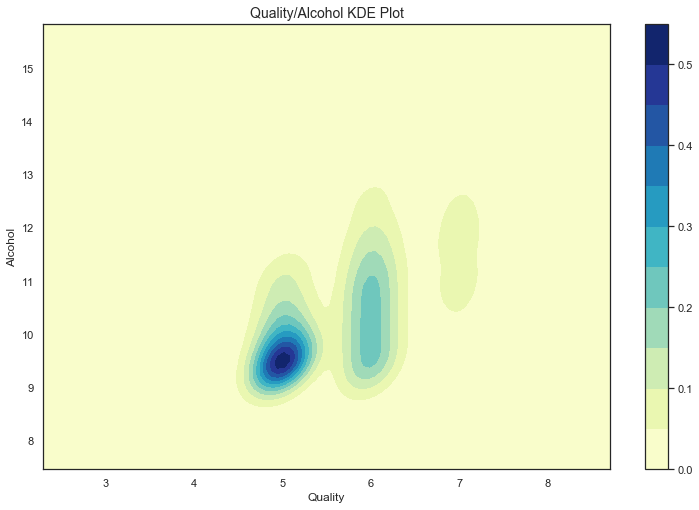

In [20]:
r1 = data_r[['quality','alcohol']]
sns.set_style("white")
sns.kdeplot(r1,cmap="YlGnBu",cbar=True,shade=True,kernel='biw',
            bw='silverman',cut=3).set_title('Quality/Alcohol KDE Plot',fontsize=14)
plt.xlabel('Quality')
plt.ylabel('Alcohol');

In [21]:
data_r['S2'] = data_r['alcohol'].apply(strong2) 
data_r.groupby('rating')['alcohol'].agg(['mean','std','count','min','max'])

,mean,std,count,min,max
rating,,,,,
Average,10.25,0.97,1319,8.40,14.90
Bad,10.22,0.92,63,8.40,13.10
Good,11.52,1.00,217,9.20,14.00


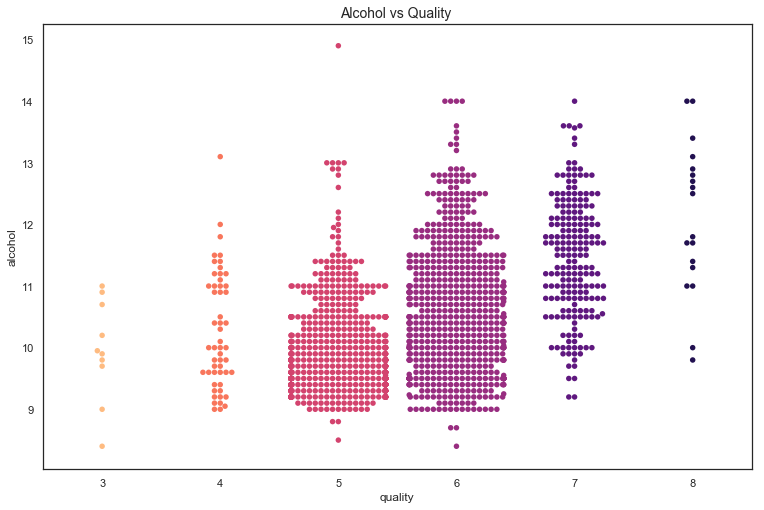

In [22]:
plt.title('Alcohol vs Quality ',fontsize=14);
sns.swarmplot(x='quality',y='alcohol',data=data_r,palette='magma_r',s=5.5);

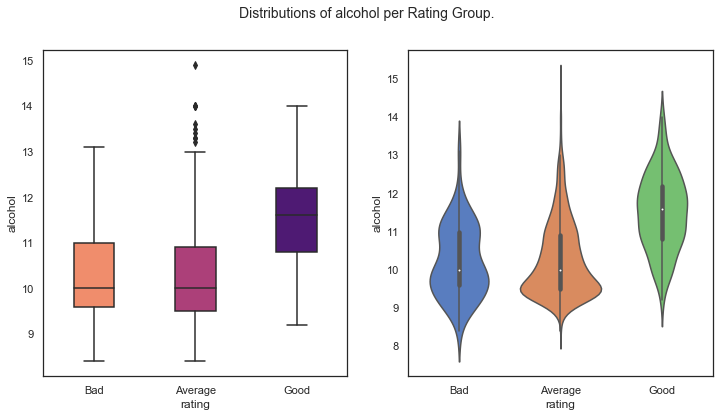

In [23]:
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.boxplot(y='alcohol',x='rating',data=data_r,ax=ax[0],width=0.4,palette='magma_r',saturation=.85,order=['Bad','Average','Good'])
sns.violinplot(y='alcohol',x='rating',data=data_r,ax=ax[1],notch=True,palette='muted',saturation=0.75,order=['Bad','Average','Good']);
plt.suptitle('Distributions of alcohol per Rating Group.',fontsize=14);

In [24]:
data_r.groupby('Strength')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
Strength,,,,,,,,
Light,37.00,5.35,0.82,3.00,5.00,6.00,6.00,6.00
Medium,1154.00,5.45,0.71,3.00,5.00,5.00,6.00,8.00
Strong,407.00,6.20,0.81,4.00,6.00,6.00,7.00,8.00
Very Strong,1.00,5.00,nan,5.00,5.00,5.00,5.00,5.00


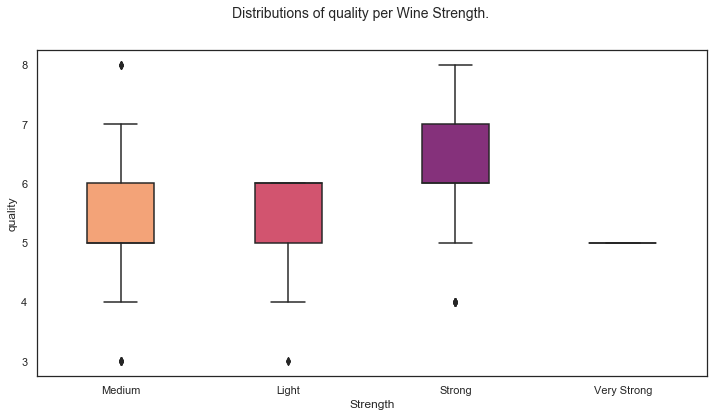

In [25]:
f, ax = plt.subplots(figsize=(12,6))
sns.boxplot(y='quality',x='Strength',data=data_r,width=0.4,palette='magma_r',saturation=.85)
plt.suptitle('Distributions of quality per Wine Strength.',fontsize=14);

#### After analysis of wine quality and alcohol. We have few insights:

* Red color wines: 1599
* Red wines min quality: 3
* Red wines max quality: 8
* Red wines average quality: 5.64
* Red wines mode for quality: 5
* Red wines min alcohol: 8.4
* Red wines max alcohol: 14.9
* Red wines average alcohol level: 10.4

#### Distribution chart shows that wines are mostly in range from 9 to 12 of alcohol.
After grouping our data by alcohol level we have 4 groups:
* Light: 37 (2.31%). Min Quality 3, Max Quality 6, Average Quality 5.35
* Medium: 1154 (72.17%). Min Quality 4, Max Quality 8, Average Quality 5.45
* Strong: 407 (25.45%). Min Quality 4, Max Quality 8, Average Quality 6.2
* Very Strong: 1 (0.06%). Average Quality 5

#### We can see that for wines with quality in range from 3 to 6 most % of wines are medium strength.
Most of wines are Average Quality which is 5 and 6 quality points. 4% of wines are bad quality. 13.57% are good quality 82.5% are Average
* Quality 3 - 80% Medium, 20% Light
* Quality 4 - 74% Medium, 23% Strong, 4% Light
* Quality 5 - 91% Medium, 7% Strong, 2% Light and ~1% Very Strong
* Quality 6 - 65% Medium, 32% Strong, 3% Light
* Quality 7 - 64% Strong, 36% Medium
* Quality 8 - 78% Strong, 22% Medium  

If we look on swarmplot with distribution of our Alcohol per Quality points. We can see that very interesting thing which is that in wine groups from 6 quality score share of Strong Wines is increasing. So we can say that most of stronger wines has good quality.

#### We can see that we have 1319 wines  avarage rated, 63 bad rated and 217 good rated.
* Average Rated: Min alcohol 8.4, Max alcohol 14.9, average alcohol 10.25
* Bad Rated: Min alcohol 8.4, Max alcohol 13.10, average alcohol 10.22
* Good Rated: Min alcohol 9.2, Max alcohol 14.0, average alcohol 11.52

So we can say that wines with better quality has average more alcohol.


## Correlation

In [46]:
r = pd.read_csv(r'Wine\winequality_red.csv')
corr = r.corr()

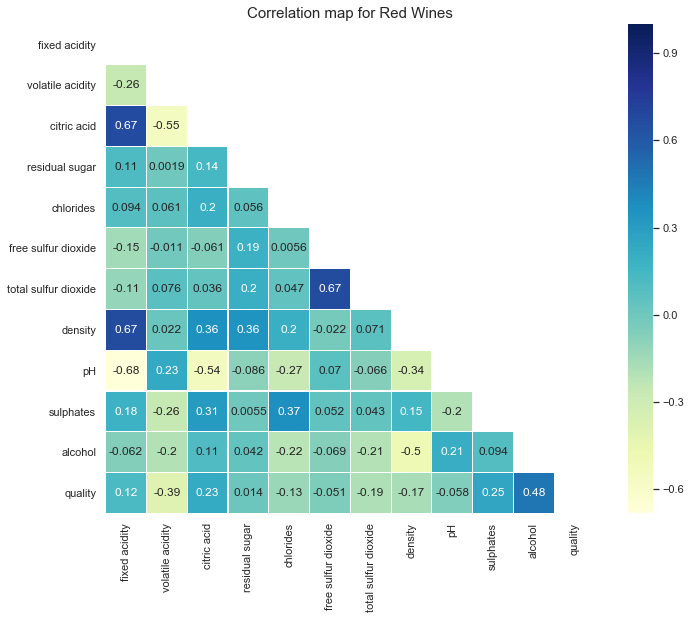

In [48]:
f,ax = plt.subplots(figsize=(12,9))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,cmap='YlGnBu',annot=True,linewidths=.1,square=True,mask=mask);
plt.title('Correlation map for Red Wines',fontsize=15);

In [99]:
cor_pos = pd.DataFrame(corr[(corr>0.5) & (corr<1)].stack())
cor_pos = cor_pos.rename(columns={0:'cor'})
cor_neg = pd.DataFrame(corr[(corr>-1) & (corr<-0.5)].stack())
cor_neg = cor_neg.rename(columns={0:'cor'})

In [107]:
cor_neg.sort_values(by='cor')*100

cor
fixed acidity    pH               -68.30
pH               fixed acidity    -68.30
volatile acidity citric acid      -55.25
citric acid      volatile acidity -55.25
                 pH               -54.19
pH               citric acid      -54.19

In [106]:
cor_pos.sort_values(by='cor')*100

,,cor
free sulfur dioxide,total sulfur dioxide,66.77
total sulfur dioxide,free sulfur dioxide,66.77
fixed acidity,density,66.80
density,fixed acidity,66.80
fixed acidity,citric acid,67.17
citric acid,fixed acidity,67.17


#### We can pretty big positive correlation between:

* citric acid : fixed acidity 0.6717
* fixed acidity : density 0.6680
* free sulfur dioxide : total sulfur dioxide 0.6677

#### There is also pretty strong negative correlation between:

* fixed acidity : pH -0.6830
* volatile acidity : citric acid -0.5525
* citric acid : pH -0.5419

In [136]:
# some colors
p1 = sns.cubehelix_palette(light=1, n_colors=6)
p2 = dict(zip(data_r.quality.unique(),
                   sns.color_palette("gnuplot_r", 12)))
p3 = dict(zip(data_r.quality.unique(),
                   sns.color_palette("gist_stern_r", 12)))

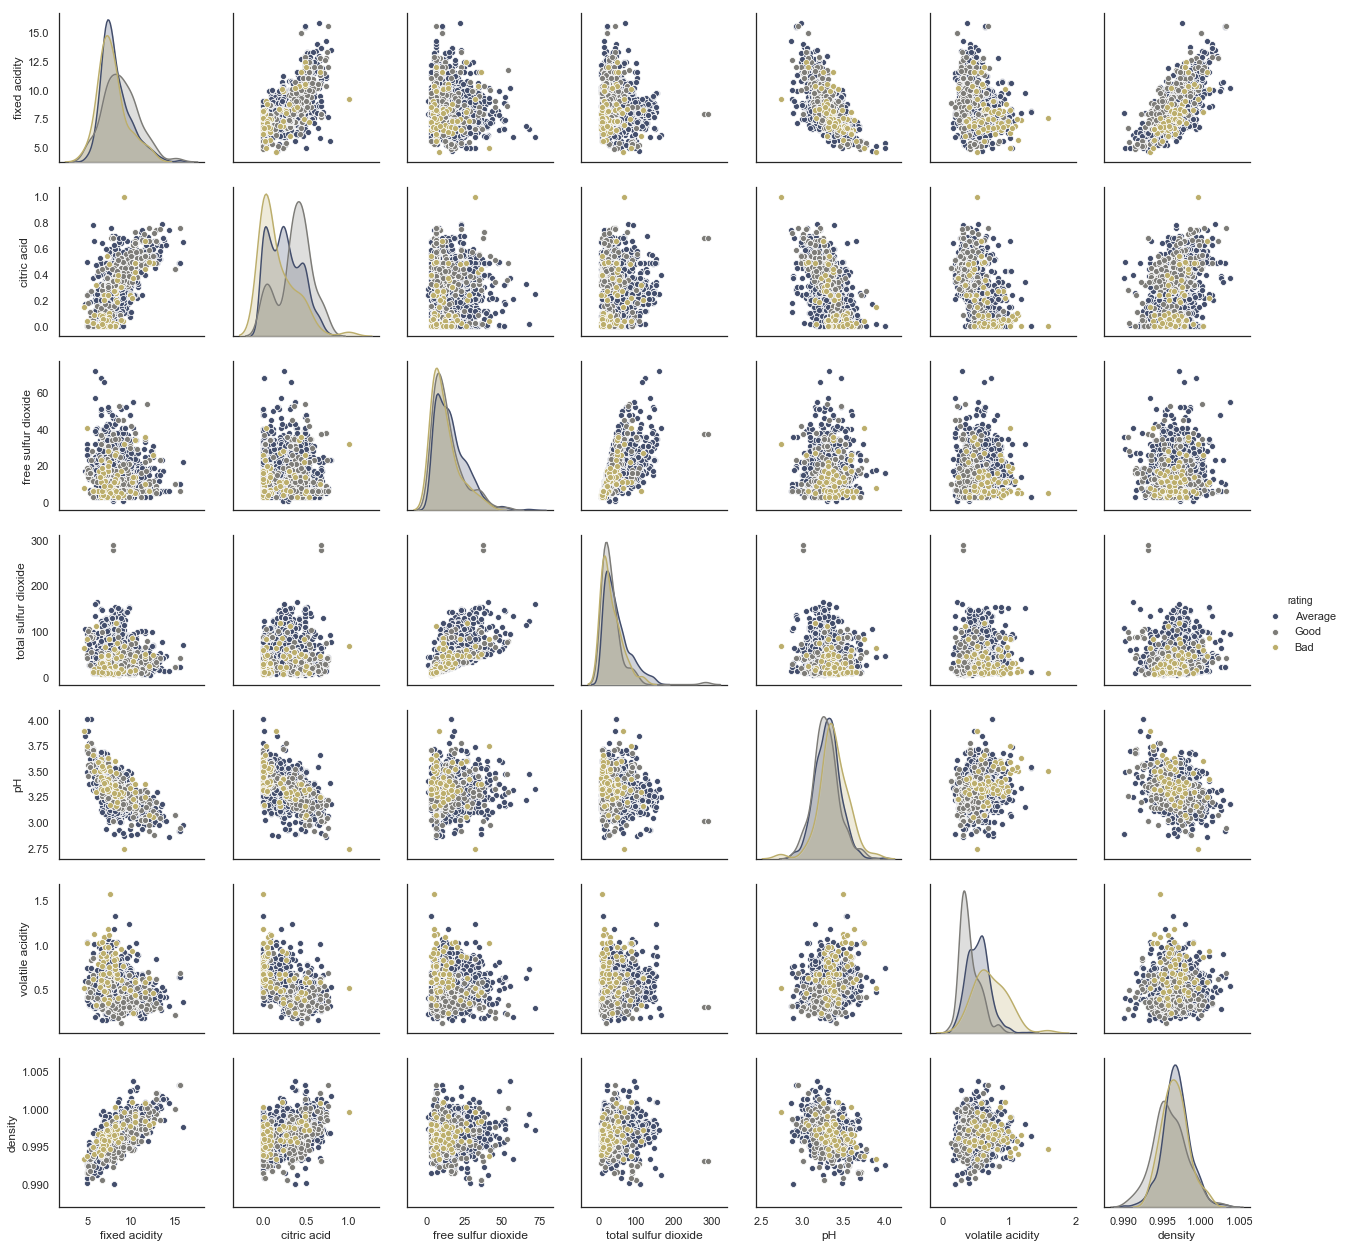

In [134]:
sns.pairplot(data_r[['fixed acidity','citric acid',
                     'free sulfur dioxide','total sulfur dioxide','pH','volatile acidity','rating','density']],
             hue='rating',palette='cividis');

In [246]:
for i in data_r['rating'].unique():
    c0r = data_r[data_r['rating']==str(i)]['citric acid'].corr(data_r[data_r['rating']==str(i)]['fixed acidity'])
    print(f'{i} group correlation : {round(c0r,2)}')
for i in data_r[data_r['Strength']!='Very Strong']['Strength'].unique():
    c0r = data_r[data_r['Strength']==str(i)]['citric acid'].corr(data_r[data_r['Strength']==str(i)]['fixed acidity'])
    print(f'{i} group correlation: {round(c0r,2)}')

Average group correlation : 0.65
Good group correlation : 0.75
Bad group correlation : 0.62
Medium group correlation: 0.66
Light group correlation: 0.73
Strong group correlation: 0.74


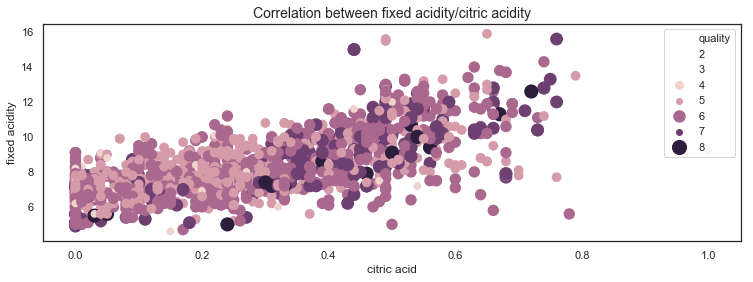

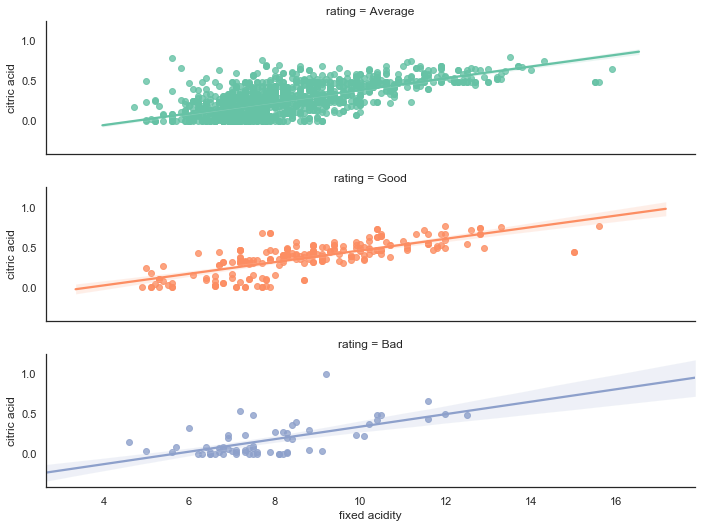

In [227]:
#sns.cubehelix_palette(light=1, n_colors=6)
f,ax = plt.subplots(figsize=(12.5,4))
sns.scatterplot(x="citric acid", y="fixed acidity",           
                palette=sns.cubehelix_palette(light=1.21, n_colors=7),
                hue='quality',
                size='quality',sizes=(26, 200), linewidth=0,
                data=data_r,hue_order = [2,3,4,5,6,7,8]);
plt.title(f'Correlation between fixed acidity/citric acidity',fontsize=14);
sns.lmplot(y="citric acid", x="fixed acidity", row="rating",
           data=data_r,hue='rating',height=2.5,aspect=4,palette='Set2');

#### There is postivie correlation between Citric Acid and Fixed Acidity: __67%__ 
Citric Acid is one of the component of fixed acid, that's exhibiting positive correlation. In every group divided by quality we can see that positive correlation between Citric Acidit and Fixed Acidity.
The biggest correlation exists in Group of Wines with Good Rating. There is correlation equal to: __0.75__
#### If we split our data by Strength group we can see that correlation between Citric Acid and Fixed Acidity looks like this:
* Medium group: 0.66
* Light group: 0.73
* Strong group: 0.74

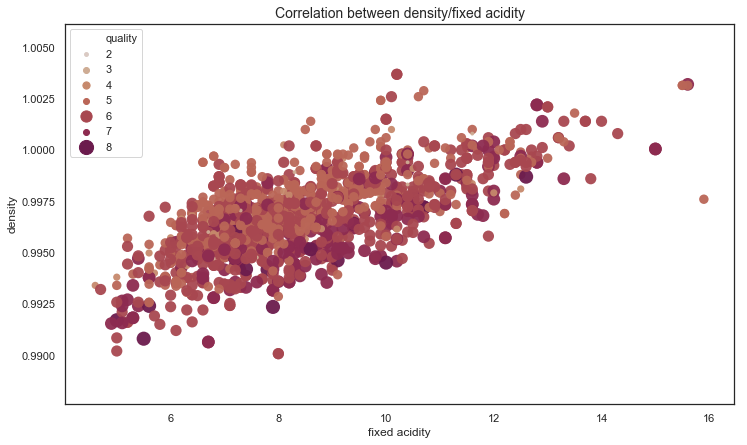

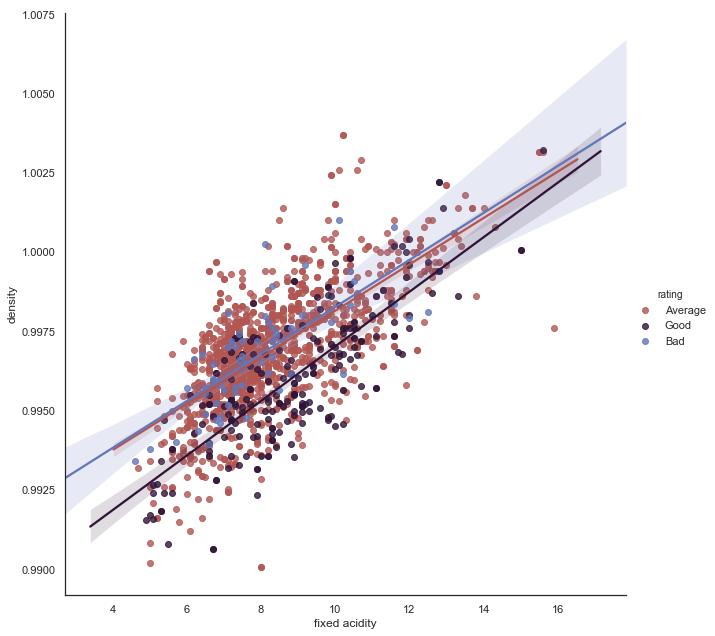

In [283]:
#fixed acidity : density 0.6680
p1 = dict(zip([2,3,4,5,6,7,8],
                   sns.color_palette("twilight_r", 17)))

f,ax = plt.subplots(figsize=(12,7))
sns.scatterplot(x="fixed acidity", y="density",           
                palette=p1,alpha=0.95,
                hue='quality',hue_order = [2,3,4,5,6,7,8],
                size='quality',sizes=(15, 200), linewidth=0,
                data=data_r);
plt.title(f'Correlation between density/fixed acidity',fontsize=14);
sns.lmplot(y="density", x="fixed acidity",
           data=data_r,hue='rating',height=9,aspect=1,palette='twilight_r');

#### There is postivie correlation between Density and Fixed Acidity: __66.80%__ 
In every group divided by quality we can see positive correlation between Density and Fixed Acidity.
#### If we split our data by Rating groups we can see that correlation between Density and Fixed Acidity looks like this:
* Average group: 0.68
* Good group: 0.78
* Bad group: 0.73

The biggest correlation exists in Group of Wines with Good Rating. There is correlation equal to: __0.78__

